# Readme.txt
_Extract from the readme.txt file_

### Structure
The VIPER dataset is split into training, validation, and test set. 
Each subset is further divided into a number of video sequences. Each video
sequence was recorded in 1 of 5 environmental conditions (day, sunset, rain, 
night, snow). The frame rate of each sequence is approximately 15 fps.

### Input images (img)
Each image was recorded in 1080p (1920x1080 pixels). Due to the large number of 
frames, we provide the images in lossy JPG and lossless PNG format. 

### 2D/3D Bounding boxes (bb)
We provide bounding boxes in 2D (on the image plane) and in 3D 
(in camera coordinate frame) for a subset of the semantic classes. The 
annotations are stored as one CSV file per frame. Each row in one of the files
corresponds to a single object instance. The format for the columns is
classID, instanceID, 2D bounding box (4 values), 3D bounding box in model 
coordinate frame (6 values), matrix to transform 3D bounding box into camera 
coordinate frame (16 values).
An example for visualizing the bounding boxes for one frame is given in 
'drawBoundingBox.m'.



## Import Weather Conditions
weather.txt : https://drive.google.com/uc?id=1fJTx6-bfKYQs1CQD1yh7RsTIjhR3n0y0&export=download

In [1]:
# Import the Weather information from weather.txt
path_weather_file = '/Users/lucas/Documents/Master Thesis/gta_dataset/train/weather.txt'

# List of the different weather conditions available
list_weather = ['day', 'sunset', 'night', 'rain', 'snow']

# Initialized dict to store weather information per folder
weather_dict = {w: [] for w in list_weather}

# File Organization [id_set, weather]:
with open(path_weather_file) as f:
    for line in f:
        # Parse line
        line_parsed = line.strip().split(',')

        # Fill the dictionary with the values
        weather_dict[line_parsed[1]].append(line_parsed[0])

# Print repartition of the weather conditions
print('Number of sequences per weather condition:')
for w, l in weather_dict.items():
    print(' \'-> ' + w + '(' + str(len(l)) + '): ' + str(l))
          

Number of sequences per weather condition:
 '-> sunset(17): ['07', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
 '-> rain(8): ['30', '31', '59', '60', '61', '62', '63', '64']
 '-> day(19): ['01', '02', '03', '04', '05', '06', '44', '45', '46', '47', '48', '49', '50', '51', '65', '66', '67', '68', '69']
 '-> night(21): ['08', '09', '10', '11', '12', '13', '52', '53', '54', '55', '56', '57', '58', '70', '71', '72', '73', '74', '75', '76', '77']
 '-> snow(12): ['32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43']


# Import Labels
train_bb.zip: https://drive.google.com/uc?id=1r9xZmfAT75geV2ieotND4U7OMbBkp2OQ&export=download

In [2]:
# Correspondance between KITTI classes and GTA classses
classes_corres = {
    'Car': ['car'],
    'Van': ['van'],
    'Truck': ['truck'],
    'Pedestrian': ['person'],
    'Person_sitting': [],
    'Cyclist': ['bicycle'],
    'Tram': ['train'],
    'Misc': ['motorcycle', 'bus', 'trailer', 'animal'],
    'DontCare': ['ambiguous'],
    'Ignore': ['unlabeled', 'sky', 'road', 'sidewalk', 'railtrack',\
               'terrain', 'tree', 'vegetation', 'building',\
               'infrastructure', 'fence', 'billboard', 'trafficlight',\
               'trafficsign', 'mobilebarrier', 'firehydrant', 'chair',\
               'trash', 'trashcan', 'plane', 'boat']
}

# Inverse classes_corres
gta2kitti = {}
for k, v_list in classes_corres.items():
    if not k == 'Ignore': # remove 'Ignore' classes
        for v in v_list:
            gta2kitti[v] = k
print(gta2kitti)

{'trailer': 'Misc', 'train': 'Tram', 'bus': 'Misc', 'bicycle': 'Cyclist', 'ambiguous': 'DontCare', 'car': 'Car', 'person': 'Pedestrian', 'van': 'Van', 'animal': 'Misc', 'motorcycle': 'Misc', 'truck': 'Truck'}


In [3]:
# Import the Classes information from classses.csv
path_classes_file = '/Users/lucas/Documents/Master Thesis/gta_dataset/readme/classes.csv'

# Extract correspondance between id and classname in the classes.csv
id2class = {}
with open(path_classes_file) as f:
    for line in f:
         # Parse line
        line_parsed = line.strip().split(',')
        
        if not line_parsed[0] == 'id': # Ignore header
            id2class[line_parsed[0]]= line_parsed[1]
 
# Create dictionnary to extract future classes from GTA dataset
classes_dict = {k:{'kitti': gta2kitti[v], 'gta': v} for k, v in id2class.items() if not v in classes_corres['Ignore']}        
print(classes_dict)

{'25': {'kitti': 'Van', 'gta': 'van'}, '21': {'kitti': 'Misc', 'gta': 'animal'}, '23': {'kitti': 'Misc', 'gta': 'motorcycle'}, '22': {'kitti': 'Cyclist', 'gta': 'bicycle'}, '1': {'kitti': 'DontCare', 'gta': 'ambiguous'}, '29': {'kitti': 'Tram', 'gta': 'train'}, '20': {'kitti': 'Pedestrian', 'gta': 'person'}, '28': {'kitti': 'Misc', 'gta': 'trailer'}, '26': {'kitti': 'Misc', 'gta': 'bus'}, '27': {'kitti': 'Truck', 'gta': 'truck'}, '24': {'kitti': 'Car', 'gta': 'car'}}


From KITTI:
 ↳ At least one object per image (Car, Cyclist or Pedestrian in  
 Easy: Min. bounding box height: 40 Px, Max. occlusion level: Fully visible, Max. truncation: 15 %
 Moderate: Min. bounding box height: 25 Px, Max. occlusion level: Partly occluded, Max. truncation: 30 %
 Hard: Min. bounding box height: 25 Px, Max. occlusion level: Difficult to see, Max. truncation: 50 %
 
 Correspondance KITTI classes with GTA_Dataset:
 'Car', 'Van', 'Truck', 'Pedestrian', 'Person_sitting', 'Cyclist', 'Tram', 'Misc' or 'DontCare'
 In KITII buses and motorcycles and trailer are considered as MISC (see 00098.png) --> try to avoid them in the selection of the images
 
 Check if train in GTA can be seen as tram in KITTI or discard.
 
 DontCare are ambiguous or too small labels
 

### Process to convert and select the labels:
1. Select only the labels we are interested in
2. convert bboxes coordinates to new ones
3. only keep the ones meeting the requirements in size 
4. Keep small cars and other classes in DontCare for training
Size image KITTI: 1242 × 375
Size original GTA dataset: 1920 x 1080

Go to folder, with correct weather, start at the 4th image (to have the three before ready)
take the next picture 15 frames later and analyse it if not enough object of interested get to nextt one until find one.


    


In [12]:
def extract_labels(path_labels_file, classes_dict):
    img_dim1 = [1920, 1080]   # size original image
    img_dim2 = [1242, 699]    # size image once cropped
    cy_min = 84               # Crop y min
    kitti_dimy = 375          # y dim of kitti images
    
    min_obj_height = 25
    max_ratio = 1.5
    
    labels_list = []
    
    # File Organization [id_set, weather]:
    with open(path_labels_file) as f:
        for line in f:
            # Parse line
            line_p = line.strip().split(',')

            class_id = line_p[0]
            x_min = int(int(line_p[2]) * img_dim2[0] / img_dim1[0])
            y_min = max(0, int(int(line_p[3]) * img_dim2[1] / img_dim1[1]) - cy_min)
            x_max = int(int(line_p[4]) * img_dim2[0] / img_dim1[0])
            y_max = min(kitti_dimy, int(int(line_p[5]) * img_dim2[1] / img_dim1[1]) - cy_min)
      
    # TODO estimate occulation for each class to avoid really hard detection
    
            if class_id in classes_dict.keys() and y_min <= kitti_dimy:
                height = y_max - y_min
                width = x_max - x_min
                ratio = height / (width + 0.00000001)
                
                class_name = classes_dict[class_id]['kitti']
                
                if (not class_name == 'Pedestrain'or not class_name == 'Cyclist') and ratio > max_ratio:
                    # Object are too much occluded
                    class_name = 'DontCare'
                
                elif height < min_obj_height:
                    # Keep the object but set is as DontCare
                    class_name = 'DontCare'
            
                labels_list.append(
                    {'type': class_name, 'bbox':{
                        'x_min': x_min,
                        'y_min': y_min,
                        'x_max': x_max,
                        'y_max': y_max}
                    }
                )
            
    return labels_list

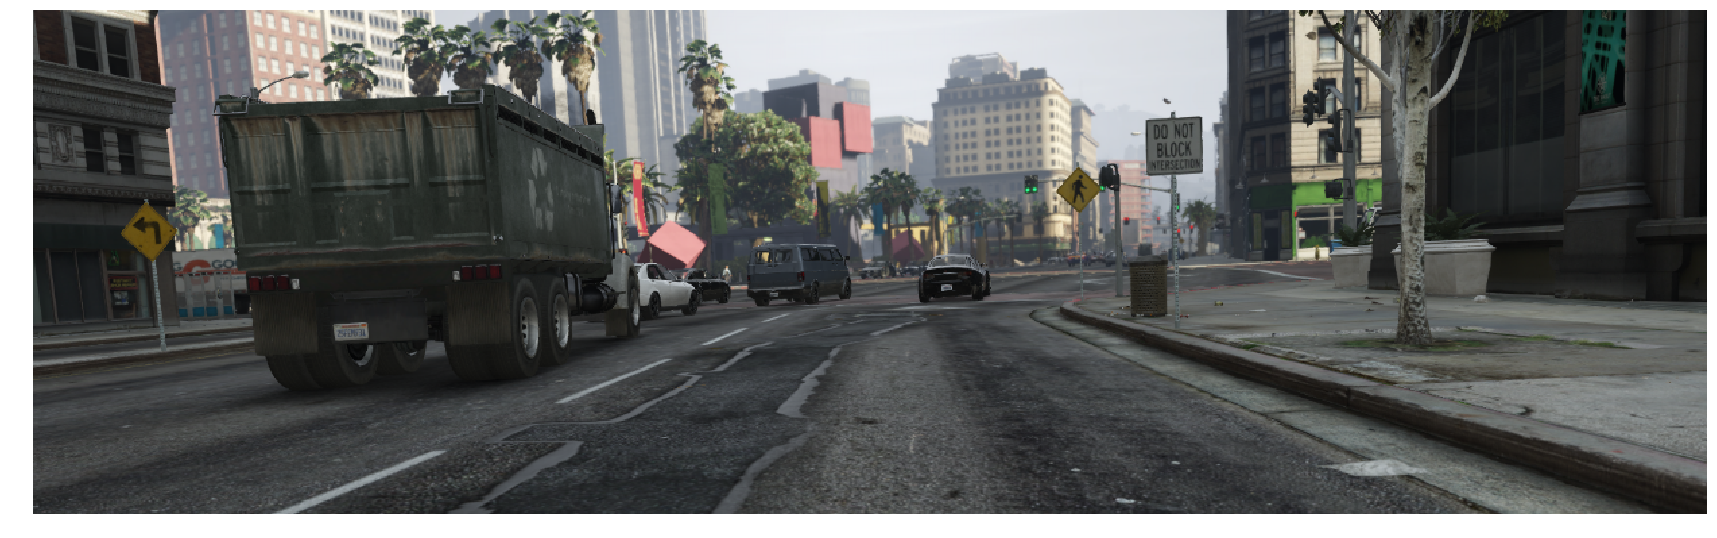

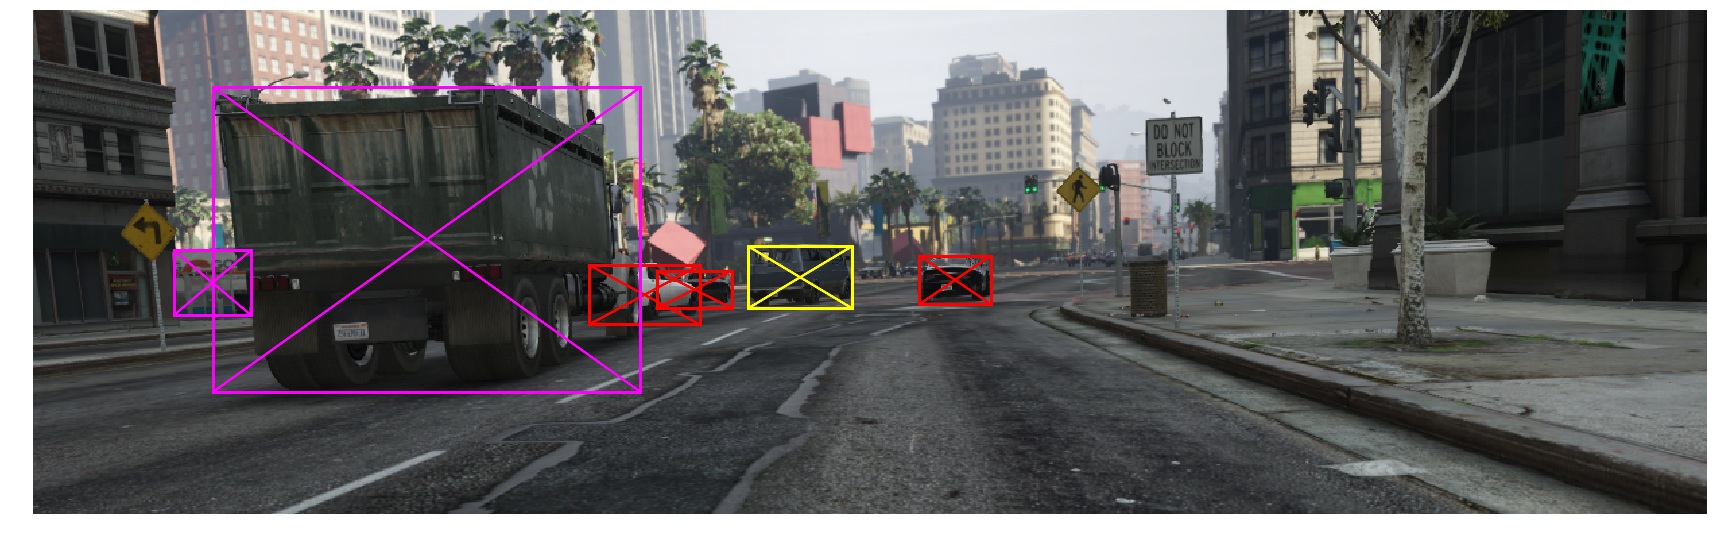

----------------------------------------------------------------------
|type            |  x_min     |  x_max     |  y_min     |  y_max     |
----------------------------------------------------------------------
----------------------------------------------------------------------
|Car             |  412       |  494       |  189       |  233       |
----------------------------------------------------------------------
|Car             |  657       |  710       |  182       |  218       |
----------------------------------------------------------------------
|Car             |  462       |  518       |  193       |  221       |
----------------------------------------------------------------------
|Van             |  530       |  607       |  175       |  221       |
----------------------------------------------------------------------
|Truck           |  133       |  450       |  57        |  283       |
----------------------------------------------------------------------
|Truck

In [14]:
from kittipy import display_im
from imageio import imread as imread
from skimage.transform import resize

%matplotlib inline

img_dim = (699,1242)
im_path = '/Users/lucas/Desktop/044_00194.png'
lb_path = '/Users/lucas/Desktop/044_00194.csv'
# TYPES_TO_DISPLAY = ['Car', 'Van', 'Truck', 'Pedestrian', 'Person_sitting', 'Cyclist', 'Tram', 'Misc', 'DontCare']
TYPES_TO_DISPLAY = ['Car', 'Van', 'Truck', 'Pedestrian', 'Person_sitting', 'Cyclist', 'Tram']

im_ = imread(im_path)
im = resize(im_, img_dim, mode='reflect')[85:459, :, :]

labels = extract_labels(lb_path, classes_dict)

display_im(im)
display_im(im, labels, types_to_display=TYPES_TO_DISPLAY)